In [1]:
# Import the relevant modules
import os
import sys
import glob

# Import third party modules
import numpy as np
import xarray as xr
import regionmask
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import dictionaries_em as dicts

In [3]:
# # Load in the onshore wind power data
# files = glob.glob(
#     os.path.join(dicts.clearheads_dir, "NUTS_0_wp_ons_sim_0_historical_loc_weighted.nc")
# )

# # Load the file
# ds = xr.open_dataset(files[0], chunks={"time": 100})

# # Print tyhe dataset
# print(ds)

In [4]:
# # Print the nuts key values
# print(ds.NUTS_keys.values)

In [5]:
# nuts_keys = ds.NUTS_keys.values

In [6]:
# # Load in the shapefile
# NUTS_shapefile = gpd.read_file("shapefiles/NUTS/NUTS_RG_10M_2021_4326.shp")

# # Look at the head of the file
# NUTS_shapefile.head()

In [7]:
# # Using the dictionary for country codes, constrain the shapefile to only include those in the country codes
# NUTS_shapefile = NUTS_shapefile[NUTS_shapefile["CNTR_CODE"].isin(nuts_keys)]

# # Constrain to onlty national level
# NUTS_shapefile = NUTS_shapefile[NUTS_shapefile["LEVL_CODE"] == 0]

In [8]:
# # Load in the shapefile fo the eez data
# EEZ_shapefile = gpd.read_file("shapefiles/EEZ/eez_v12.shp")

# # Constrain the EEZ shapefile to where the column "SOVEREIGN2" is equal
# # to the country lists in the dictionary
# EEZ_shapefile = EEZ_shapefile[EEZ_shapefile["SOVEREIGN1"].isin(dicts.countries_list)]

In [9]:
# EEZ_shapefile

In [10]:
# # Print all of the column names for the eeZ shapefile
# print(EEZ_shapefile.columns)

In [11]:
# # Plot these shapes with different colors for each country
# plt.figure(figsize=(10, 10))
# ax = plt.axes()
# NUTS_shapefile.boundary.plot(ax=ax)

In [12]:
# # PLot the eez shapes
# plt.figure(figsize=(10, 10))
# ax = plt.axes()
# EEZ_shapefile.geometry.plot(ax=ax)
# # Constrain to specific bounds
# ax.set_xlim(-50, 50)
# ax.set_ylim(30, 80)

Now we want to process the correlation data for the EEZ domains, then plot the strength of these correlations on the map.

In [13]:
# # Import the functions
# import functions_em as funcs

# # Extract the data from the .nc file
# eez_cfs = funcs.extract_offshore_eez_to_df(
#     filepath=os.path.join(dicts.clearheads_dir, "EEZ_zones_wp_historical.nc")
# )

In [14]:
# # Look at the head of the dataframe
# eez_cfs.head()

In [15]:
# Import the functions
import functions_em as funcs

ERROR 1: PROJ: proj_create_from_database: Open of /apps/jasmin/jaspy/mambaforge_envs/jaspy3.10/mf-22.11.1-4/envs/jaspy3.10-mf-22.11.1-4-r20230718/share/proj failed


In [25]:
import importlib

importlib.reload(funcs)

<module 'functions_em' from '/home/users/benhutch/energy-met-corr/functions_em.py'>

In [26]:
# test the other function for doing this
cfs, corr_df = funcs.correlate_nao_uread(
    filename="EEZ_zones_wp_historical.nc",
    shp_file="eez_v12.shp",
    shp_file_dir="shapefiles/EEZ/",
    obs_var="si10",
)

NUTS_keys for UREAD data:  ['ES' 'NO' 'UK' 'IE' 'FI' 'SE' 'BE' 'NL' 'DE' 'DK' 'PO' 'FR' 'IT' 'PT'
 'EE' 'LI' 'LV' 'HR' 'RO' 'SI' 'GR' 'TR' 'MT' 'AL' 'BG']
The observed variable is not mean sea level pressure.
calculating correlation skill for gridpoint variable
Averaging data for EEZ domains
Shape of clim_var_anomaly:  (60, 72, 144)
<regionmask.Regions 'unnamed'>
overlap:  False

Regions:
 0 PRT Portuguese Exclusive Economic Zone
 1 IRL      Irish Exclusive Economic Zone
 2 MLT    Maltese Exclusive Economic Zone
 3 GRC      Greek Exclusive Economic Zone
 4 TUR    Turkish Exclusive Economic Zone
..  ..                                ...
19 SVN  Slovenian Exclusive Economic Zone
20 FRA     French Exclusive Economic Zone
21 GBR    British Exclusive Economic Zone
22 NOR  Norwegian Exclusive Economic Zone
23 ESP    Spanish Exclusive Economic Zone

[24 regions]
<xarray.DataArray 'mask' (lat: 18, lon: 33)>
array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, n

SystemExit: 

/apps/jasmin/jaspy/mambaforge_envs/jaspy3.10/mf-22.11.1-4/envs/jaspy3.10-mf-22.11.1-4-r20230718/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [18]:
cfs.head()

,ES,NO,UK,IE,FI,SE,BE,NL,DE,DK,...,LV,HR,RO,SI,GR,TR,MT,AL,BG,NAO anomaly (Pa)
1964-12-31,0.484011,0.588192,0.625989,0.680295,0.506070,0.504670,0.567749,0.583326,0.572031,0.562861,...,0.551736,0.317215,0.441299,0.0,0.383178,0.353909,0.277367,0.309614,0.418305,-263.307915
1965-12-31,0.485404,0.587854,0.623884,0.675909,0.505175,0.500834,0.564292,0.580379,0.567321,0.556950,...,0.552177,0.316208,0.445542,0.0,0.388816,0.358320,0.278524,0.310649,0.426743,-398.950264
1966-12-31,0.485558,0.585045,0.623956,0.674387,0.496668,0.491019,0.559140,0.577548,0.563846,0.549513,...,0.537800,0.312884,0.448921,0.0,0.392327,0.360686,0.279371,0.312071,0.431473,-392.726360
1967-12-31,0.481957,0.587782,0.627295,0.673570,0.501746,0.498297,0.565502,0.588240,0.576535,0.558334,...,0.546084,0.307474,0.447668,0.0,0.389807,0.358890,0.271839,0.307856,0.429846,-307.768564
1968-12-31,0.480453,0.593806,0.629429,0.669331,0.508093,0.503686,0.566467,0.591715,0.583839,0.569484,...,0.551089,0.308064,0.452348,0.0,0.391516,0.358720,0.274820,0.311600,0.434270,-258.192728


In [19]:
corr_df.head()

,region,correlation,p-value
0,ES,-0.482741,2.513263e-04
1,NO,0.865946,5.746968e-17
2,UK,0.768317,1.872968e-11
3,IE,0.553987,1.682257e-05
4,FI,0.858640,2.028261e-16


In [20]:
# Drop the Nans from the dataframe
corr_df = corr_df.dropna()

In [21]:
# Load in the shapefile fo the eez data
EEZ_shapefile = gpd.read_file("shapefiles/EEZ/eez_v12.shp")

In [22]:
EEZ_shapefile.head()

,MRGID,GEONAME,MRGID_TER1,POL_TYPE,MRGID_SOV1,TERRITORY1,ISO_TER1,SOVEREIGN1,MRGID_TER2,MRGID_SOV2,...,ISO_SOV1,ISO_SOV2,ISO_SOV3,UN_SOV1,UN_SOV2,UN_SOV3,UN_TER1,UN_TER2,UN_TER3,geometry
0,8444,United States Exclusive Economic Zone (America...,8670.0,200NM,2204,American Samoa,ASM,United States,NaN,NaN,...,USA,None,None,840,NaN,NaN,16.0,NaN,NaN,"POLYGON ((-166.64112 -17.55527, -166.64194 -17..."
1,8379,British Exclusive Economic Zone (Ascension),8620.0,200NM,2208,Ascension,SHN,United Kingdom,NaN,NaN,...,GBR,None,None,826,NaN,NaN,654.0,NaN,NaN,"POLYGON ((-10.93328 -7.88745, -10.93324 -7.889..."
2,8446,New Zealand Exclusive Economic Zone (Cook Isla...,8672.0,200NM,2227,Cook Islands,COK,New Zealand,NaN,NaN,...,NZL,None,None,554,NaN,NaN,184.0,NaN,NaN,"POLYGON ((-159.27579 -5.80051, -158.38466 -6.3..."
3,8389,Overlapping claim Falkland / Malvinas Islands:...,8623.0,Overlapping claim,2208,Falkland / Malvinas Islands,FLK,United Kingdom,8623.0,2149.0,...,GBR,ARG,None,826,32.0,NaN,238.0,238.0,NaN,"POLYGON ((-58.54196 -56.22782, -61.62049 -53.7..."
4,8440,French Exclusive Economic Zone (French Polynesia),8656.0,200NM,17,French Polynesia,PYF,France,NaN,NaN,...,FRA,None,None,250,NaN,NaN,258.0,NaN,NaN,"MULTIPOLYGON (((-135.92820 -7.89810, -135.9265..."


In [23]:
# Print all of the column names for the eeZ shapefile
print(EEZ_shapefile.columns)

Index(['MRGID', 'GEONAME', 'MRGID_TER1', 'POL_TYPE', 'MRGID_SOV1',
       'TERRITORY1', 'ISO_TER1', 'SOVEREIGN1', 'MRGID_TER2', 'MRGID_SOV2',
       'TERRITORY2', 'ISO_TER2', 'SOVEREIGN2', 'MRGID_TER3', 'MRGID_SOV3',
       'TERRITORY3', 'ISO_TER3', 'SOVEREIGN3', 'X_1', 'Y_1', 'MRGID_EEZ',
       'AREA_KM2', 'ISO_SOV1', 'ISO_SOV2', 'ISO_SOV3', 'UN_SOV1', 'UN_SOV2',
       'UN_SOV3', 'UN_TER1', 'UN_TER2', 'UN_TER3', 'geometry'],
      dtype='object')


In [24]:
# Throw away all of the columns, apart from "GEONAME", 'SOVEREIGN1',
# "ISOSOV1", "geometry"
EEZ_shapefile = EEZ_shapefile[["GEONAME", "SOVEREIGN1", "ISO_SOV1", "geometry"]]

In [25]:
EEZ_shapefile.head()

,GEONAME,SOVEREIGN1,ISO_SOV1,geometry
0,United States Exclusive Economic Zone (America...,United States,USA,"POLYGON ((-166.64112 -17.55527, -166.64194 -17..."
1,British Exclusive Economic Zone (Ascension),United Kingdom,GBR,"POLYGON ((-10.93328 -7.88745, -10.93324 -7.889..."
2,New Zealand Exclusive Economic Zone (Cook Isla...,New Zealand,NZL,"POLYGON ((-159.27579 -5.80051, -158.38466 -6.3..."
3,Overlapping claim Falkland / Malvinas Islands:...,United Kingdom,GBR,"POLYGON ((-58.54196 -56.22782, -61.62049 -53.7..."
4,French Exclusive Economic Zone (French Polynesia),France,FRA,"MULTIPOLYGON (((-135.92820 -7.89810, -135.9265..."


In [26]:
iso_sov1 = EEZ_shapefile["ISO_SOV1"].values

In [27]:
iso_sov1

array(['USA', 'GBR', 'NZL', 'GBR', 'FRA', 'GBR', 'GBR', 'WSM', 'TON',
       'GBR', 'CHL', 'NZL', 'URY', 'PER', 'URY', 'NZL', 'PER', 'CHL',
       'CHL', 'BRA', 'KIR', 'ARG', 'FRA', 'AUS', 'AUS', 'COM', 'FRA',
       'FRA', 'FRA', 'AUS', 'FRA', 'MDG', 'ZAF', 'FRA', 'AUS', 'MUS',
       'FRA', 'VUT', 'NAM', 'TLS', 'COG', 'AGO', 'MOZ', 'KEN', 'PNG',
       'ZAF', 'TZA', 'SLB', 'SYC', 'MDG', 'FRA', 'FRA', 'COD', 'AUS',
       'AUS', 'FRA', 'FRA', 'TLS', 'GBR', 'ATG', 'NLD', 'PRT', 'BHS',
       'BRB', 'MEX', 'NLD', 'GBR', 'CPV', 'ESP', 'GBR', 'FRA', 'PAN',
       'CRI', 'NLD', 'DMA', 'DOM', 'GTM', 'DNK', 'GMB', 'GIB', 'GRD',
       'FRA', 'SLE', 'ISL', 'JAM', 'PRT', 'MRT', 'GBR', 'HTI', 'USA',
       'USA', 'NLD', 'FRA', 'NLD', 'KNA', 'LCA', 'FRA', 'FRA', 'VCT',
       'NLD', 'TTO', 'GBR', 'USA', 'PRT', 'SLV', 'BLZ', 'CUB', 'HTI',
       'FRA', 'SEN', 'VEN', 'FRA', 'GBR', 'CAN', 'CRI', 'NIC', 'GUY',
       'BRB', 'DOM', 'COL', 'IRL', 'GBR', 'GBR', 'SEN', 'GNB', 'GIN',
       'CIV', 'GUY',

In [28]:
# Extract the values of the region column from corr_df
region_values = corr_df.region.values

In [29]:
region_values

array(['ES', 'NO', 'UK', 'IE', 'FI', 'SE', 'BE', 'NL', 'DE', 'DK', 'PO',
       'FR', 'IT', 'PT', 'EE', 'LI', 'LV', 'HR', 'RO', 'GR', 'TR', 'MT',
       'AL', 'BG'], dtype=object)

In [30]:
# reload the dictionary
importlib.reload(dicts)

<module 'dictionaries_em' from '/home/users/benhutch/energy-met-corr/dictionaries_em.py'>

In [31]:
# Convert the region values to equivalent iso_sov1 values
# using the mapping in the dictionary
iso_sov1_values = [dicts.iso_mapping[region] for region in region_values]

In [32]:
iso_sov1_values

['ESP',
 'NOR',
 'GBR',
 'IRL',
 'FIN',
 'SWE',
 'BEL',
 'NLD',
 'DEU',
 'DNK',
 'POL',
 'FRA',
 'ITA',
 'PRT',
 'EST',
 'LIE',
 'LVA',
 'HRV',
 'ROU',
 'GRC',
 'TUR',
 'MLT',
 'ALB',
 'BGR']

In [33]:
# Constrain the geo dataframe to only include the iso_sov1 values
EEZ_shapefile = EEZ_shapefile[EEZ_shapefile["ISO_SOV1"].isin(iso_sov1_values)]

In [34]:
# Find where ISO_SOV1 is equal to "ITA"
EEZ_shapefile.head()

,GEONAME,SOVEREIGN1,ISO_SOV1,geometry
1,British Exclusive Economic Zone (Ascension),United Kingdom,GBR,"POLYGON ((-10.93328 -7.88745, -10.93324 -7.889..."
3,Overlapping claim Falkland / Malvinas Islands:...,United Kingdom,GBR,"POLYGON ((-58.54196 -56.22782, -61.62049 -53.7..."
4,French Exclusive Economic Zone (French Polynesia),France,FRA,"MULTIPOLYGON (((-135.92820 -7.89810, -135.9265..."
5,British Exclusive Economic Zone (Pitcairn),United Kingdom,GBR,"POLYGON ((-133.43269 -26.58425, -133.42472 -26..."
6,British Exclusive Economic Zone (Saint Helena),United Kingdom,GBR,"POLYGON ((-2.16889 -15.89574, -2.16877 -15.900..."


In [35]:
# Where corr_df.region passed through iso_mapping dict is
# equal to the values in EEZ_shapefile.ISO_SOV1
# Add the corresponding correlation and p-value to the dataframe

In [36]:
# Filter df to only include the rows where GEONAME includes: "Exclusive Economic Zone"
EEZ_shapefile = EEZ_shapefile[
    EEZ_shapefile["GEONAME"].str.contains("Exclusive Economic Zone")
]

In [37]:
EEZ_shapefile.head()

,GEONAME,SOVEREIGN1,ISO_SOV1,geometry
1,British Exclusive Economic Zone (Ascension),United Kingdom,GBR,"POLYGON ((-10.93328 -7.88745, -10.93324 -7.889..."
4,French Exclusive Economic Zone (French Polynesia),France,FRA,"MULTIPOLYGON (((-135.92820 -7.89810, -135.9265..."
5,British Exclusive Economic Zone (Pitcairn),United Kingdom,GBR,"POLYGON ((-133.43269 -26.58425, -133.42472 -26..."
6,British Exclusive Economic Zone (Saint Helena),United Kingdom,GBR,"POLYGON ((-2.16889 -15.89574, -2.16877 -15.900..."
9,British Exclusive Economic Zone (Tristan da Cu...,United Kingdom,GBR,"POLYGON ((-12.29053 -33.72223, -12.28172 -33.7..."


In [38]:
# Now we want to append the correlation and p-value to the dataframe
# Add a new column to corr_df called "ISO_SOV1"
corr_df["ISO_SOV1"] = iso_sov1_values

In [39]:
corr_df.head()

,region,correlation,p-value,ISO_SOV1
0,ES,-0.482741,2.513263e-04,ESP
1,NO,0.865946,5.746968e-17,NOR
2,UK,0.768317,1.872968e-11,GBR
3,IE,0.553987,1.682257e-05,IRL
4,FI,0.858640,2.028261e-16,FIN


In [40]:
# Loop over the columns in EEZ_shapefile and add the correlation and p-value
# where the ISO_SOV1 values are equal
for index, row in EEZ_shapefile.iterrows():
    # Extract the ISO_SOV1 value
    iso_sov1 = row["ISO_SOV1"]
    # Find the index of the row in corr_df that matches the ISO_SOV1
    index_corr = corr_df[corr_df["ISO_SOV1"] == iso_sov1].index
    # Add the correlation and p-value to the dataframe
    EEZ_shapefile.loc[index, "correlation"] = corr_df.loc[
        index_corr, "correlation"
    ].values
    EEZ_shapefile.loc[index, "p-value"] = corr_df.loc[index_corr, "p-value"].values

In [41]:
EEZ_shapefile

,GEONAME,SOVEREIGN1,ISO_SOV1,geometry,correlation,p-value
1,British Exclusive Economic Zone (Ascension),United Kingdom,GBR,"POLYGON ((-10.93328 -7.88745, -10.93324 -7.889...",0.768317,1.872968e-11
4,French Exclusive Economic Zone (French Polynesia),France,FRA,"MULTIPOLYGON (((-135.92820 -7.89810, -135.9265...",0.341905,1.221842e-02
5,British Exclusive Economic Zone (Pitcairn),United Kingdom,GBR,"POLYGON ((-133.43269 -26.58425, -133.42472 -26...",0.768317,1.872968e-11
6,British Exclusive Economic Zone (Saint Helena),United Kingdom,GBR,"POLYGON ((-2.16889 -15.89574, -2.16877 -15.900...",0.768317,1.872968e-11
9,British Exclusive Economic Zone (Tristan da Cu...,United Kingdom,GBR,"POLYGON ((-12.29053 -33.72223, -12.28172 -33.7...",0.768317,1.872968e-11
...,...,...,...,...,...,...
269,Norwegian Exclusive Economic Zone,Norway,NOR,"POLYGON ((3.06563 56.23378, 3.00865 56.27937, ...",0.865946,5.746968e-17
271,Norwegian Exclusive Economic Zone (Jan Mayen),Norway,NOR,"POLYGON ((2.35622 71.17424, 2.35184 71.15638, ...",0.865946,5.746968e-17
273,Spanish Exclusive Economic Zone,Spain,ESP,"MULTIPOLYGON (((4.54375 42.44867, 4.86147 42.0...",-0.482741,2.513263e-04
276,British Exclusive Economic Zone (Bermuda),United Kingdom,GBR,"POLYGON ((-60.70499 32.39114, -60.70499 32.390...",0.768317,1.872968e-11


In [42]:
# Remove any rows from EEZ shapefile which contain "(*)" in the GEONAME column
EEZ_shapefile = EEZ_shapefile[~EEZ_shapefile["GEONAME"].str.contains(r"\(.*\)")]

In [43]:
EEZ_shapefile

,GEONAME,SOVEREIGN1,ISO_SOV1,geometry,correlation,p-value
103,Portuguese Exclusive Economic Zone,Portugal,PRT,"POLYGON ((-7.48092 37.49540, -7.48088 37.49512...",-0.321497,1.890409e-02
120,Irish Exclusive Economic Zone,Ireland,IRL,"POLYGON ((-10.80937 48.18019, -10.82517 48.180...",0.553987,1.682257e-05
164,Maltese Exclusive Economic Zone,Malta,MLT,"POLYGON ((17.49726 35.06441, 17.32031 34.96318...",-0.693034,8.883704e-09
170,Greek Exclusive Economic Zone,Greece,GRC,"POLYGON ((26.02346 40.72030, 26.01452 40.71574...",-0.325540,1.737639e-02
171,Turkish Exclusive Economic Zone,Turkey,TUR,"POLYGON ((36.18250 43.43444, 36.84500 43.18194...",-0.314463,2.183348e-02
175,Albanian Exclusive Economic Zone,Albania,ALB,"POLYGON ((20.00835 39.69182, 20.00810 39.69187...",-0.701157,5.010536e-09
176,Bulgarian Exclusive Economic Zone,Bulgaria,BGR,"POLYGON ((31.33082 43.43989, 31.15346 43.35329...",-0.309584,2.408317e-02
208,Estonian Exclusive Economic Zone,Estonia,EST,"POLYGON ((24.66175 59.45443, 24.66517 59.45578...",0.822168,4.440847e-14
209,Finnish Exclusive Economic Zone,Finland,FIN,"POLYGON ((27.35543 60.48886, 27.35988 60.48797...",0.858640,2.028261e-16
210,Swedish Exclusive Economic Zone,Sweden,SWE,"MULTIPOLYGON (((22.56800 67.07789, 22.57641 67...",0.927949,1.647721e-23


In [44]:
print(type(EEZ_shapefile))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [45]:
# Reload the dicts
importlib.reload(dicts)

<module 'dictionaries_em' from '/home/users/benhutch/energy-met-corr/dictionaries_em.py'>

(30.0, 80.0)

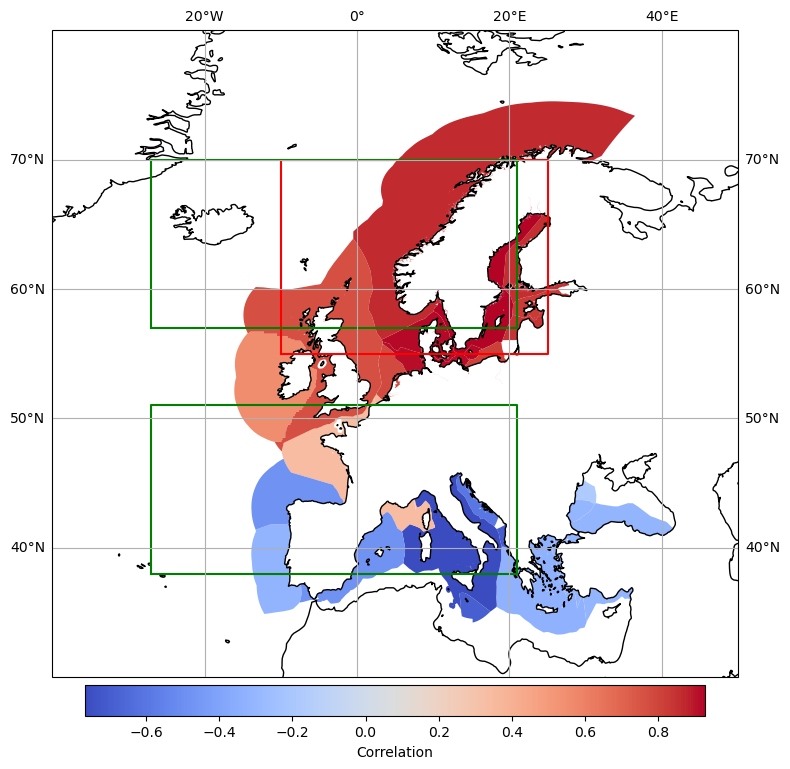

In [47]:
# Import cartopy
import cartopy.crs as ccrs

# Now plot the EEZ_shapefile with the correlation as the color
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
EEZ_shapefile.plot(
    column="correlation",
    ax=ax,
    legend=True,
    cmap="coolwarm",
    legend_kwds={
        "label": "Correlation",
        "orientation": "horizontal",
        "shrink": 0.8,
        "pad": 0.01,
    },
)
# Use cartopy to add the coastlines
ax.coastlines()
# Make the colorbar smaller
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel("Correlation", fontsize=12)
cbar.tick_params(labelsize=10)

# Extract the lats of the northern eu grid box
lat1, lat2 = dicts.northern_europe_grid["lat1"], dicts.northern_europe_grid["lat2"]
lon1, lon2 = dicts.northern_europe_grid["lon1"], dicts.northern_europe_grid["lon2"]

# Plot the grid box
plt.plot([lon1, lon2, lon2, lon1, lon1], [lat1, lat1, lat2, lat2, lat1], "r")

# Include hazels grid box
lat1_n, lat2_n = dicts.uk_n_box_corrected["lat1"], dicts.uk_n_box_corrected["lat2"]
lon1_n, lon2_n = dicts.uk_n_box_corrected["lon1"], dicts.uk_n_box_corrected["lon2"]

# Plot the grid box
plt.plot(
    [lon1_n, lon2_n, lon2_n, lon1_n, lon1_n],
    [lat1_n, lat1_n, lat2_n, lat2_n, lat1_n],
    "g",
)

# Include hazels grid box
lat1_s, lat2_s = dicts.uk_s_box_corrected["lat1"], dicts.uk_s_box_corrected["lat2"]
lon1_s, lon2_s = dicts.uk_s_box_corrected["lon1"], dicts.uk_s_box_corrected["lon2"]

# Plot the grid box
plt.plot(
    [lon1_s, lon2_s, lon2_s, lon1_s, lon1_s],
    [lat1_s, lat1_s, lat2_s, lat2_s, lat1_s],
    "g",
)

# Include ticks for the lat and lon
ax.gridlines(draw_labels=True)

# Constrain to specific bounds
ax.set_xlim(-40, 50)
ax.set_ylim(30, 80)

In [48]:
# Reload the dictionary
importlib.reload(dicts)

<module 'dictionaries_em' from '/home/users/benhutch/energy-met-corr/dictionaries_em.py'>

In [49]:
# Limit the EEZ_shapefile to only include only the ISO_SOV1 values
# Which are in dicts.eez_agg_countries
EEZ_shapefile_n = EEZ_shapefile[EEZ_shapefile["ISO_SOV1"].isin(dicts.eez_agg_countries)]

(30.0, 80.0)

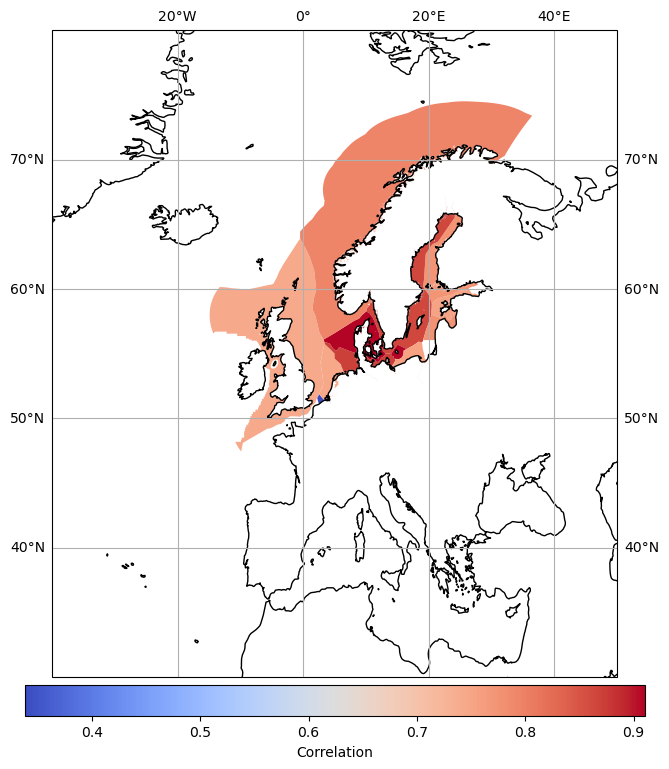

In [67]:
# Now plot the EEZ_shapefile with the correlation as the color
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
EEZ_shapefile_n.plot(
    column="correlation",
    ax=ax,
    legend=True,
    cmap="coolwarm",
    legend_kwds={
        "label": "Correlation",
        "orientation": "horizontal",
        "shrink": 0.8,
        "pad": 0.01,
    },
)
# Use cartopy to add the coastlines
ax.coastlines()
# Make the colorbar smaller
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel("Correlation", fontsize=12)
cbar.tick_params(labelsize=10)

# Include ticks for the lat and lon
ax.gridlines(draw_labels=True)

# Constrain to specific bounds
ax.set_xlim(-40, 50)
ax.set_ylim(30, 80)

In [50]:
corr_df.head()

,region,correlation,p-value,ISO_SOV1
0,ES,-0.482741,2.513263e-04,ESP
1,NO,0.865946,5.746968e-17,NOR
2,UK,0.768317,1.872968e-11,GBR
3,IE,0.553987,1.682257e-05,IRL
4,FI,0.858640,2.028261e-16,FIN


In [51]:
cfs.head()

,ES,NO,UK,IE,FI,SE,BE,NL,DE,DK,...,LV,HR,RO,SI,GR,TR,MT,AL,BG,NAO anomaly (Pa)
1964-12-31,0.484011,0.588192,0.625989,0.680295,0.506070,0.504670,0.567749,0.583326,0.572031,0.562861,...,0.551736,0.317215,0.441299,0.0,0.383178,0.353909,0.277367,0.309614,0.418305,-263.307915
1965-12-31,0.485404,0.587854,0.623884,0.675909,0.505175,0.500834,0.564292,0.580379,0.567321,0.556950,...,0.552177,0.316208,0.445542,0.0,0.388816,0.358320,0.278524,0.310649,0.426743,-398.950264
1966-12-31,0.485558,0.585045,0.623956,0.674387,0.496668,0.491019,0.559140,0.577548,0.563846,0.549513,...,0.537800,0.312884,0.448921,0.0,0.392327,0.360686,0.279371,0.312071,0.431473,-392.726360
1967-12-31,0.481957,0.587782,0.627295,0.673570,0.501746,0.498297,0.565502,0.588240,0.576535,0.558334,...,0.546084,0.307474,0.447668,0.0,0.389807,0.358890,0.271839,0.307856,0.429846,-307.768564
1968-12-31,0.480453,0.593806,0.629429,0.669331,0.508093,0.503686,0.566467,0.591715,0.583839,0.569484,...,0.551089,0.308064,0.452348,0.0,0.391516,0.358720,0.274820,0.311600,0.434270,-258.192728


In [52]:
# reload the dicts
importlib.reload(dicts)

<module 'dictionaries_em' from '/home/users/benhutch/energy-met-corr/dictionaries_em.py'>

In [53]:
# replace the column headings in cfs with those mapped using dicts.iso_mapping
for key in dicts.iso_mapping:
    cfs = cfs.rename(columns={key: dicts.iso_mapping[key]})

In [54]:
cfs.head()

,ESP,NOR,GBR,IRL,FIN,SWE,BEL,NLD,DEU,DNK,...,LVA,HRV,ROU,SVN,GRC,TUR,MLT,ALB,BGR,NAO anomaly (Pa)
1964-12-31,0.484011,0.588192,0.625989,0.680295,0.506070,0.504670,0.567749,0.583326,0.572031,0.562861,...,0.551736,0.317215,0.441299,0.0,0.383178,0.353909,0.277367,0.309614,0.418305,-263.307915
1965-12-31,0.485404,0.587854,0.623884,0.675909,0.505175,0.500834,0.564292,0.580379,0.567321,0.556950,...,0.552177,0.316208,0.445542,0.0,0.388816,0.358320,0.278524,0.310649,0.426743,-398.950264
1966-12-31,0.485558,0.585045,0.623956,0.674387,0.496668,0.491019,0.559140,0.577548,0.563846,0.549513,...,0.537800,0.312884,0.448921,0.0,0.392327,0.360686,0.279371,0.312071,0.431473,-392.726360
1967-12-31,0.481957,0.587782,0.627295,0.673570,0.501746,0.498297,0.565502,0.588240,0.576535,0.558334,...,0.546084,0.307474,0.447668,0.0,0.389807,0.358890,0.271839,0.307856,0.429846,-307.768564
1968-12-31,0.480453,0.593806,0.629429,0.669331,0.508093,0.503686,0.566467,0.591715,0.583839,0.569484,...,0.551089,0.308064,0.452348,0.0,0.391516,0.358720,0.274820,0.311600,0.434270,-258.192728


In [55]:
# Reload dicts
importlib.reload(dicts)

<module 'dictionaries_em' from '/home/users/benhutch/energy-met-corr/dictionaries_em.py'>

In [56]:
# Create a new column in cfs called N_Europe
# which is the average of all of the countries (columns) in dicts.eez_agg_countries
cfs["N_Europe"] = cfs[dicts.eez_agg_countries].mean(axis=1)

In [57]:
cfs.head()

,ESP,NOR,GBR,IRL,FIN,SWE,BEL,NLD,DEU,DNK,...,HRV,ROU,SVN,GRC,TUR,MLT,ALB,BGR,NAO anomaly (Pa),N_Europe
1964-12-31,0.484011,0.588192,0.625989,0.680295,0.506070,0.504670,0.567749,0.583326,0.572031,0.562861,...,0.317215,0.441299,0.0,0.383178,0.353909,0.277367,0.309614,0.418305,-263.307915,0.555545
1965-12-31,0.485404,0.587854,0.623884,0.675909,0.505175,0.500834,0.564292,0.580379,0.567321,0.556950,...,0.316208,0.445542,0.0,0.388816,0.358320,0.278524,0.310649,0.426743,-398.950264,0.552810
1966-12-31,0.485558,0.585045,0.623956,0.674387,0.496668,0.491019,0.559140,0.577548,0.563846,0.549513,...,0.312884,0.448921,0.0,0.392327,0.360686,0.279371,0.312071,0.431473,-392.726360,0.545624
1967-12-31,0.481957,0.587782,0.627295,0.673570,0.501746,0.498297,0.565502,0.588240,0.576535,0.558334,...,0.307474,0.447668,0.0,0.389807,0.358890,0.271839,0.307856,0.429846,-307.768564,0.553111
1968-12-31,0.480453,0.593806,0.629429,0.669331,0.508093,0.503686,0.566467,0.591715,0.583839,0.569484,...,0.308064,0.452348,0.0,0.391516,0.358720,0.274820,0.311600,0.434270,-258.192728,0.558384


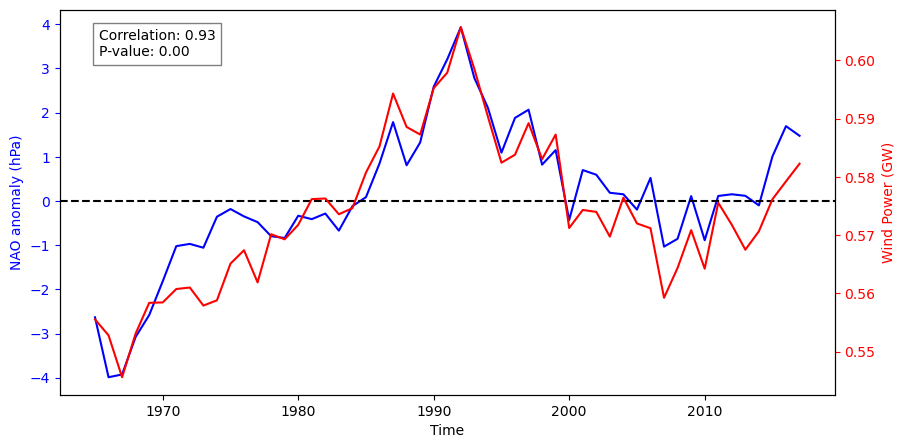

In [58]:
from scipy.stats import pearsonr

# Create a plot with two y-axes
# Time on the x-axes
# The variable on the left y-axes is the NAO anomaly (Pa)
# The variable on the right y-axes is the wind power (GW) for N_Europe
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the NAO anomaly
ax1.plot(cfs.index, cfs["NAO anomaly (Pa)"] / 100, "b-")

# Set the x-axis label
ax1.set_xlabel("Time")

# Set the y-axis label
ax1.set_ylabel("NAO anomaly (hPa)", color="b")

# Include a black dashed line for y=0
ax1.axhline(0, color="black", linestyle="--")

# Set the color of the ticks
ax1.tick_params("y", colors="b")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the wind power
ax2.plot(cfs.index, cfs.N_Europe, "r-")

# Set the y-axis label
ax2.set_ylabel("Wind Power (GW)", color="r")

# Set the colour of the ticks
ax2.tick_params("y", colors="r")

# Calculate the correlation between the NAO anomaly and the wind power
corr, p = pearsonr(cfs["NAO anomaly (Pa)"], cfs.N_Europe)

# Include the correlation and p-value on the plot
ax2.text(
    0.05,
    0.95,
    f"Correlation: {corr:.2f}\nP-value: {p:.2f}",
    horizontalalignment="left",
    verticalalignment="top",
    bbox=dict(facecolor="white", alpha=0.5),
    transform=ax2.transAxes,
)

# Show the plot
plt.show()

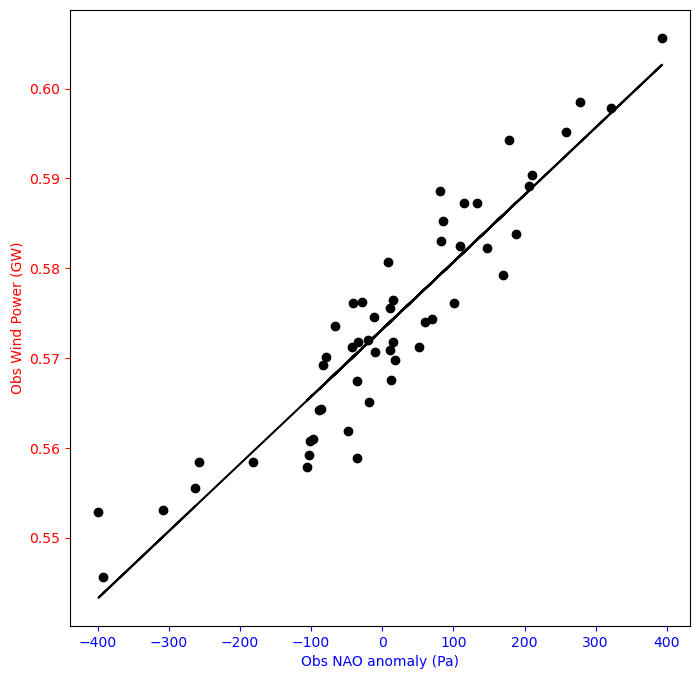

In [60]:
# Plot a scatter plot of NAO agaist wind power
plt.figure(figsize=(8, 8))

# Plot the scatter plot
plt.scatter(cfs["NAO anomaly (Pa)"], cfs.N_Europe, color="k")

# Include a line of best fit
m, b = np.polyfit(cfs["NAO anomaly (Pa)"], cfs.N_Europe, 1)

# Plot the line of best fit
plt.plot(cfs["NAO anomaly (Pa)"], m * cfs["NAO anomaly (Pa)"] + b, "k")

# Set the x-axis label
plt.xlabel("Obs NAO anomaly (Pa)", color="b")

# Set the xticks to blue
plt.tick_params(axis="x", colors="b")

# Set the y-axis label
plt.ylabel("Obs Wind Power (GW)", color="r")

# Set the yticks to red
plt.tick_params(axis="y", colors="r")

In [ ]:
# Load in the ERA5 data for the NAO index
# Use this file
# adaptor.mars.internal-1691509121.3261805-29348-4-3a487c76-fc7b-421f-b5be-7436e2eb78d7.nc
# in ~/ERA5/
# Load the dataset
era5_data_path = "~/ERA5/adaptor.mars.internal-1691509121.3261805-29348-4-3a487c76-fc7b-421f-b5be-7436e2eb78d7.nc"

# Load the data into chunks
ds_era5 = xr.open_mfdataset(
    era5_data_path,
    combine="by_coords",
    parallel=True,
    chunks={"time": 100, "latitude": 100, "longitude": 100},
)[
    "msl"
]  # for mean sea level pressure

# Combine the first two expver variables
obs_msl = ds_era5.sel(expver=1).combine_first(ds_era5.sel(expver=5))

In [ ]:
# Constrain obs to ONDJFM
obs_msl = obs_msl.sel(time=obs_msl.time.dt.month.isin([10, 11, 12, 1, 2, 3]))

# Shift the time index back by 3 months
obs_msl_shifted = obs_msl.shift(time=-3)

# Take annual means
obs_msl_annual = obs_msl_shifted.resample(time="Y").mean()

# Throw away years 1959, 2021, 2022 and 2023
obs_msl_annual = obs_msl_annual.sel(time=slice("1960", "2019"))

# Remove the climatology
obs_msl_anomaly = obs_msl_annual - obs_msl_annual.mean(dim="time")

In [ ]:
# Extract the lats and lons of the azores
lat1, lat2 = dicts.era5_azores["lat1"], dicts.era5_azores["lat2"]
lon1, lon2 = dicts.era5_azores["lon1"], dicts.era5_azores["lon2"]

# Calculate the mean for the azores gridbox
obs_msl_anomaly_azores = obs_msl_anomaly.sel(
    latitude=slice(lat1, lat2), longitude=slice(lon1, lon2)
).mean(dim=["latitude", "longitude"])

In [ ]:
# Same for iceland
lat1, lat2 = dicts.era5_iceland["lat1"], dicts.era5_iceland["lat2"]
lon1, lon2 = dicts.era5_iceland["lon1"], dicts.era5_iceland["lon2"]

# Calculate the mean for the iceland gridbox
obs_msl_anomaly_iceland = obs_msl_anomaly.sel(
    latitude=slice(lat1, lat2), longitude=slice(lon1, lon2)
).mean(dim=["latitude", "longitude"])

In [ ]:
# Calculate the NAO index (azores - iceland)
nao_index = obs_msl_anomaly_azores - obs_msl_anomaly_iceland

In [ ]:
# EXtract the time series
nao_index_time = nao_index.time.values

# Extract the values
nao_index_values = nao_index.values

# Create a dataframe
nao_df = pd.DataFrame({"time": nao_index_time, "value": nao_index_values})

# Take a centred 8-year running mean
nao_running = nao_df.set_index("time").rolling(8, center=True).mean()

In [ ]:
# Have a look at the dataframe
nao_running.head()

In [ ]:
# Drop the NaN values
nao_running = nao_running.dropna()

In [ ]:
# Combine the two dataframes into one, using the index of the first
eez_df = eez_cfs.join(nao_running, how="inner")

In [ ]:
eez_df.head()

In [ ]:
# Rename the value column as 'NAO anomaly (Pa)'
eez_df = eez_df.rename(columns={"value": "NAO anomaly (Pa)"})

In [ ]:
# Drop the rows which contain NaN values in the NAO anomaly column
eez_df = eez_df.dropna()

In [ ]:
eez_df.head()

In [ ]:
from scipy.stats import pearsonr
import pandas as pd

# Create a new dataframe with columns for:
# 'region' - e.g. Netherlands_7
# 'correlation' - the correlation between the NAO and the offshore wind CFs
# 'p-value' - the p-value of the correlation
# Set up the dataframe
correlation_df = pd.DataFrame(columns=["region", "correlation", "p-value"])

# Loop over the regions
for region in eez_df.columns[:-1]:
    # Calculate the correlation
    corr, p = pearsonr(eez_df[region], eez_df["NAO anomaly (Pa)"])

    # Create a new DataFrame to append
    df_to_append = pd.DataFrame(
        {"region": [region], "correlation": [corr], "p-value": [p]}
    )

    # Append to the dataframe
    correlation_df = pd.concat([correlation_df, df_to_append], ignore_index=True)

In [ ]:
correlation_df.head()

In [ ]:
# Remove the numbers from the region column by removing the last 2 characters
correlation_df["region"] = correlation_df["region"].str

In [ ]:
correlation_df

In [ ]:
# if any of the region names contain the string "_" then remove it
correlation_df["region"] = correlation_df["region"].str.replace("_", " ")

In [ ]:
correlation_df.head()

In [ ]:
EEZ_shapefile["SOVEREIGN1"]

In [ ]:
# Create two new columns in the geopandas dataframe 'EEZ_shapefile'
# 'correlation' - the correlation between the NAO and the offshore wind CFs
# 'p-value' - the p-value of the correlation
EEZ_shapefile["correlation"] = np.nan
EEZ_shapefile["p-value"] = np.nan

In [ ]:
EEZ_shapefile.head()

In [ ]:
# Loop over the regions in correlation_df
for region in correlation_df["region"]:
    # Extract the row from correlation_df
    row = correlation_df[correlation_df["region"] == region]

    # Extract the correlation and p-value
    corr = row["correlation"].values[0]
    p = row["p-value"].values[0]

    # Set the values in the EEZ_shapefile
    EEZ_shapefile.loc[EEZ_shapefile["TERRITORY1"] == region, "correlation"] = corr
    EEZ_shapefile.loc[EEZ_shapefile["TERRITORY1"] == region, "p-value"] = p

In [ ]:
EEZ_shapefile["TERRITORY1"] == "France", "correlation"

In [ ]:
# Extract the list of Terrirories
territories = EEZ_shapefile["TERRITORY1"]

# Convert to a list
territories = list(territories)

# Print the territories
print(territories)

In [ ]:
# Constrain EEZ shapefile to only include the territories in the list
EEZ_shapefile = EEZ_shapefile[EEZ_shapefile["TERRITORY1"].isin(dicts.countries_list)]

In [ ]:
# Print the correlation values for FRance
print(EEZ_shapefile[EEZ_shapefile["SOVEREIGN1"] == "France"]["correlation"])

In [ ]:
# Import cartopy
import cartopy.crs as ccrs

# Now plot the EEZ_shapefile with the correlation as the color
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
EEZ_shapefile.plot(
    column="correlation", ax=ax, legend=True, cmap="coolwarm", shrink=0.5
)
# Use cartopy to add the coastlines
ax.coastlines()
# Make the colorbar smaller
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel("Correlation", fontsize=12)
cbar.tick_params(labelsize=10)

# Constrain to specific bounds
ax.set_xlim(-50, 50)
ax.set_ylim(30, 80)

In [ ]:
# Now plot the EEZ_shapefile with the correlation as the color
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": ccrs.PlateCarree()})
cax = EEZ_shapefile.plot(
    column="correlation", ax=ax, cmap="coolwarm", add_colorbar=False
)

# Use cartopy to add the coastlines
ax.coastlines()

# Add colorbar
cbar = fig.colorbar(cax.collections[0], ax=ax, shrink=0.5)
cbar.set_label("Correlation")

# Constrain to specific bounds
ax.set_xlim(-50, 50)
ax.set_ylim(30, 80)